## ライブラリのインポート
optimizer_moduleは内部でtalib, matplotlib, pandasを使用している。

talibはpip installではそのままインストールできないので注意

In [1]:
import importlib

import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader

from optimizer_module import optimizer_rsi
from optimizer_module import optimizer_slow_stoch
from optimizer_module import optimizer_fast_stoch
from optimizer_module import optimizer_william

# importlib.reload(optimizer_rsi)
# importlib.reload(optimizer_slow_stoch)
# importlib.reload(optimizer_fast_stoch)
# importlib.reload(optimizer_william)

## 株価データの取得
株価データをpandas_datareaderで取得し、dfとする

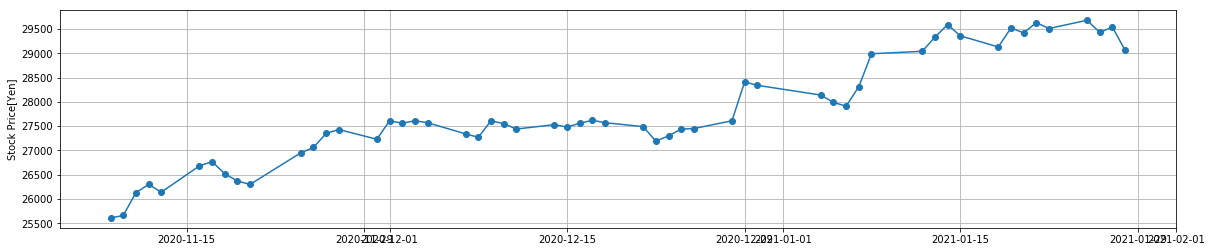

In [2]:
df = pandas_datareader.DataReader('1321.JP', 'stooq')
df = df.sort_index().tail(55)  # sorted by date

fig = plt.figure(figsize=(20, 4))
plt.plot(df["Close"], marker="o")
plt.ylabel("Stock Price[Yen]")
plt.grid()
fig.show()

## インスタンス化

In [3]:
optimizer_rsi = optimizer_rsi.RsiOptimizer()
optimizer_slow_stoch = optimizer_slow_stoch.SlowStochOptimizer()
optimizer_fast_stoch = optimizer_fast_stoch.FastStochOptimizer()
optimizer_william = optimizer_william.WilliamrOptimizer()

## パラメータ設定
set_params()関数で解析するパラメータを設定する。

help(rsi_optimizer.set_params())で設定の仕方を詳細確認できる

In [4]:
optimizer_rsi.set_params([3, 14], [25, 40], [75, 90])
optimizer_slow_stoch.set_params([3, 21], [2, 7], [2, 7])
optimizer_fast_stoch.set_params([3, 21], [2, 7])
optimizer_william.set_params([3, 21], [-80, -65], [-30, -10])

## 実行
runコマンドで実行する。その際dfを引数に設定する。
戻り値は解析結果を返すが、設定しなくても良い

計算量Ο(n^3)の為、マルチスレッドで並列計算処理を行う。

In [5]:
result_rsi = optimizer_rsi.run(df)
result_slow_stoch = optimizer_slow_stoch.run(df)
result_fast_stoch = optimizer_fast_stoch.run(df)
result_william = optimizer_william.run(df)

Thread START RSI Span=3
Thread START RSI Span=4
Thread START RSI Span=5
Thread START RSI Span=6
Thread START RSI Span=7
Thread START RSI Span=8
Thread START RSI Span=9
Thread START RSI Span=10
Thread START RSI Span=11
Thread START RSI Span=12
Thread START RSI Span=13
Thread START RSI Span=14

計算終了
Thread START SlowStoch Fast-K=3
Thread START SlowStoch Fast-K=4
Thread START SlowStoch Fast-K=5
Thread START SlowStoch Fast-K=6
Thread START SlowStoch Fast-K=7
Thread START SlowStoch Fast-K=8
Thread START SlowStoch Fast-K=9
Thread START SlowStoch Fast-K=10
Thread START SlowStoch Fast-K=11
Thread START SlowStoch Fast-K=12
Thread START SlowStoch Fast-K=13
Thread START SlowStoch Fast-K=14
Thread START SlowStoch Fast-K=15
Thread START SlowStoch Fast-K=16
Thread START SlowStoch Fast-K=17
Thread START SlowStoch Fast-K=18
Thread START SlowStoch Fast-K=19
Thread START SlowStoch Fast-K=20
Thread START SlowStoch Fast-K=21

計算終了
Thread START FastStoch Span=3
Thread START FastStoch Span=4
Thread START Fa

## 解析結果の確認
計算後、result_params()関数で最適化したパラメータを確認できる(python dict型)

In [6]:
print(optimizer_rsi.result_params())
print(optimizer_slow_stoch.result_params())
print(optimizer_fast_stoch.result_params())
print(optimizer_william.result_params())

{'span': 5, 'buy_thres': 26, 'sell_thres': 88, 'profit': 105.87}
{'fastk': 4, 'slowk': 7, 'slowd': 6, 'profit': 109.99}
{'fastk': 11, 'fastd': 7, 'profit': 106.49}
{'span': 4, 'buy_thres': -72, 'sell_thres': -11, 'profit': 109.38}


## 全計算結果の表示
run()関数の返り値は、pandas.DataFrame型で返されるので必要に応じて確認できる。

In [7]:
result_rsi.head(3)

,span,buy,sell,profit
2441,6,38,86,105.865209
1708,6,34,85,105.865209
1944,6,35,85,105.865209


In [8]:
result_slow_stoch.head(3)

,fastk,slowk,slowd,profit
367,4,7,6,109.991322
146,10,4,5,109.735708
293,4,6,6,109.628496


In [9]:
result_fast_stoch.head(3)

,fastk,fastd,profit
47,11,7,106.485228
109,13,7,106.449254
56,12,7,106.449254


In [10]:
result_william.head(3)

,span,buy,sell,profit
4633,4,-73,-11,109.383486
2235,4,-77,-11,109.383486
3337,4,-75,-11,109.383486


## 解析結果のグラフ化
計算後、result_graph()関数でmatplotlibを用いてグラフ表示できる。

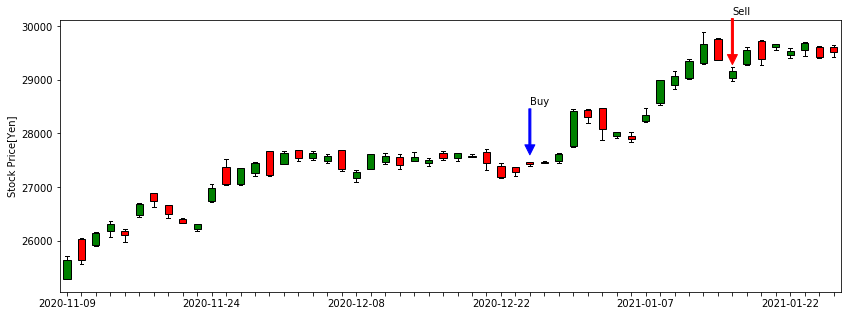

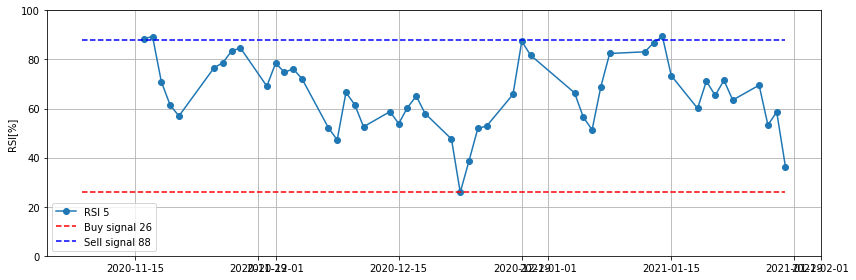

In [11]:
optimizer_rsi.result_graph()

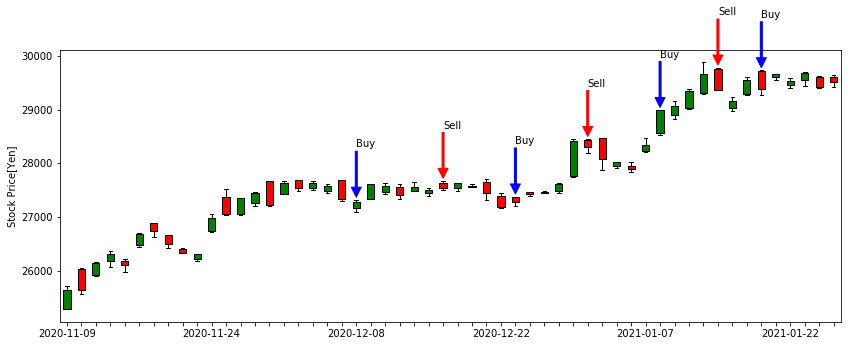

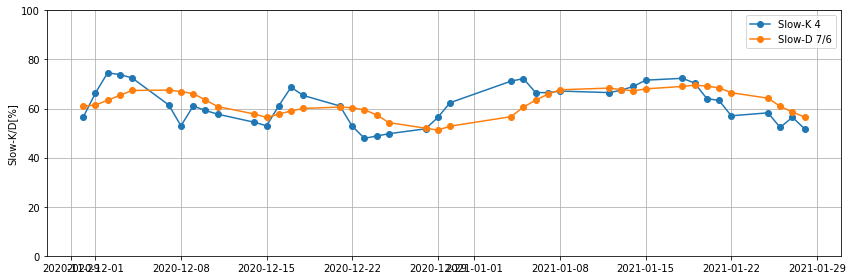

In [12]:
optimizer_slow_stoch.result_graph()

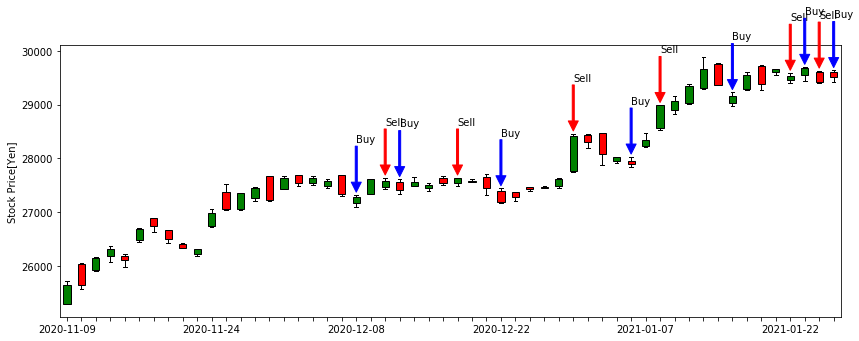

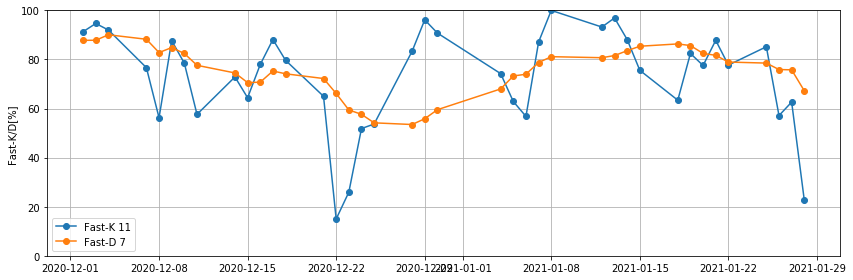

In [13]:
optimizer_fast_stoch.result_graph()

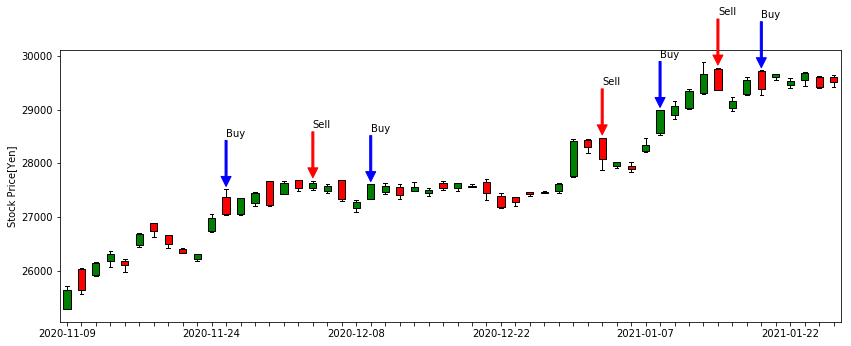

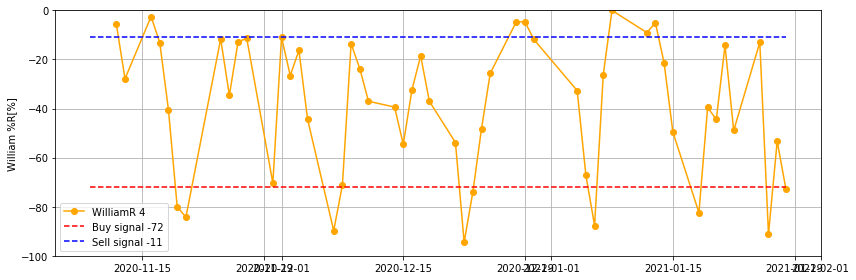

In [14]:
optimizer_william.result_graph()